In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette("dark")
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
pd.set_option('display.max_columns', None)

In [14]:
df = pd.read_csv('../data/2001-2019-National-Data-Age-Sex.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   95 non-null     int64  
 1   Age Group                              95 non-null     object 
 2   Veteran Suicide Deaths                 95 non-null     int64  
 3   Veteran Population Estimate            95 non-null     int64  
 4   Veteran Crude Rate per 100,000         95 non-null     float64
 5   Male Veteran Suicide Deaths            95 non-null     int64  
 6   Male Veteran Population Estimate       95 non-null     int64  
 7   Male Veteran Crude Rate per 100,000    95 non-null     float64
 8   Age Group 2                            76 non-null     object 
 9   Female Veteran Suicide Deaths          76 non-null     float64
 10  Female Veteran Population Estimate     76 non-null     float64
 11  Female V

In [37]:
def lst_columns(df):
    df = list(df.columns)
    return df

In [38]:
lst_columns(df)

['Year',
 'Age Group',
 'Veteran Suicide Deaths',
 'Veteran Population Estimate',
 'Veteran Crude Rate per 100,000',
 'Male Veteran Suicide Deaths',
 'Male Veteran Population Estimate',
 'Male Veteran Crude Rate per 100,000',
 'Age Group 2',
 'Female Veteran Suicide Deaths',
 'Female Veteran Population Estimate',
 'Female Veteran Crude Rate per 100,000',
 'Veteran Population Estimate in millions']

In [16]:
df.head()

,Year,Age Group,Veteran Suicide Deaths,Veteran Population Estimate,"Veteran Crude Rate per 100,000",Male Veteran Suicide Deaths,Male Veteran Population Estimate,"Male Veteran Crude Rate per 100,000",Age Group 2,Female Veteran Suicide Deaths,Female Veteran Population Estimate,"Female Veteran Crude Rate per 100,000"
0,2001,18-34,618,2616000,23.6,588,2223000,26.5,18-34,30.0,393000.0,7.6
1,2001,35-54,2505,8899000,28.1,2398,8137000,29.5,35-54,107.0,762000.0,14.0
2,2001,55-74,1689,9761000,17.3,1678,9512000,17.6,55+,17.0,466000.0,3.6
3,2001,75+,1174,4457000,26.3,1168,4240000,27.5,NaN,NaN,NaN,NaN
4,2001,Total,5989,25733000,23.3,5835,24112000,24.2,Total,154.0,1621000.0,9.5


In [17]:
df.describe()

,Year,Veteran Suicide Deaths,Veteran Population Estimate,"Veteran Crude Rate per 100,000",Male Veteran Suicide Deaths,Male Veteran Population Estimate,"Male Veteran Crude Rate per 100,000",Female Veteran Suicide Deaths,Female Veteran Population Estimate,"Female Veteran Crude Rate per 100,000"
count,95.000000,95.000000,9.500000e+01,95.000000,95.000000,9.500000e+01,95.000000,76.000000,7.600000e+01,76.000000
mean,2010.000000,2542.031579,9.120863e+06,29.124211,2447.568421,8.391832e+06,31.062105,118.078947,9.112895e+05,12.628947
std,5.506283,2003.929684,7.328383e+06,5.350536,1930.093933,6.801922e+06,6.472038,84.667942,5.566310e+05,4.317092
min,2001.000000,531.000000,1.863000e+06,17.300000,498.000000,1.514000e+06,17.600000,17.000000,3.490000e+05,3.600000
25%,2005.000000,1340.500000,4.558500e+06,25.950000,1330.500000,4.380500e+06,27.650000,53.500000,4.517500e+05,9.675000
50%,2010.000000,1868.000000,6.627000e+06,28.900000,1798.000000,5.781000e+06,30.500000,107.000000,7.875000e+05,13.100000
75%,2015.000000,2465.500000,9.677000e+06,30.950000,2376.000000,9.360000e+06,32.950000,151.250000,1.048750e+06,15.400000
max,2019.000000,6761.000000,2.573300e+07,47.700000,6384.000000,2.411200e+07,53.100000,377.000000,1.992000e+06,24.100000


In [18]:
df = df[df['Age Group'] != 'Total']

In [19]:
df['Veteran Population Estimate in millions'] = df['Veteran Population Estimate']/1000000

In [20]:
df.head()

,Year,Age Group,Veteran Suicide Deaths,Veteran Population Estimate,"Veteran Crude Rate per 100,000",Male Veteran Suicide Deaths,Male Veteran Population Estimate,"Male Veteran Crude Rate per 100,000",Age Group 2,Female Veteran Suicide Deaths,Female Veteran Population Estimate,"Female Veteran Crude Rate per 100,000",Veteran Population Estimate in millions
0,2001,18-34,618,2616000,23.6,588,2223000,26.5,18-34,30.0,393000.0,7.6,2.616
1,2001,35-54,2505,8899000,28.1,2398,8137000,29.5,35-54,107.0,762000.0,14.0,8.899
2,2001,55-74,1689,9761000,17.3,1678,9512000,17.6,55+,17.0,466000.0,3.6,9.761
3,2001,75+,1174,4457000,26.3,1168,4240000,27.5,NaN,NaN,NaN,NaN,4.457
5,2002,18-34,589,2504000,23.5,565,2112000,26.8,18-34,24.0,392000.0,6.1,2.504


In [21]:
def filter_column(df, col, value):
    df = df[df[col] == value]
    return df

In [22]:
df_18_34 = filter_column(df,'Age Group', '18-34')
df_35_54 = filter_column(df,'Age Group', '35-54')
df_55_74 = filter_column(df,'Age Group', '55-74')
df_75 = filter_column(df,'Age Group', '75+')

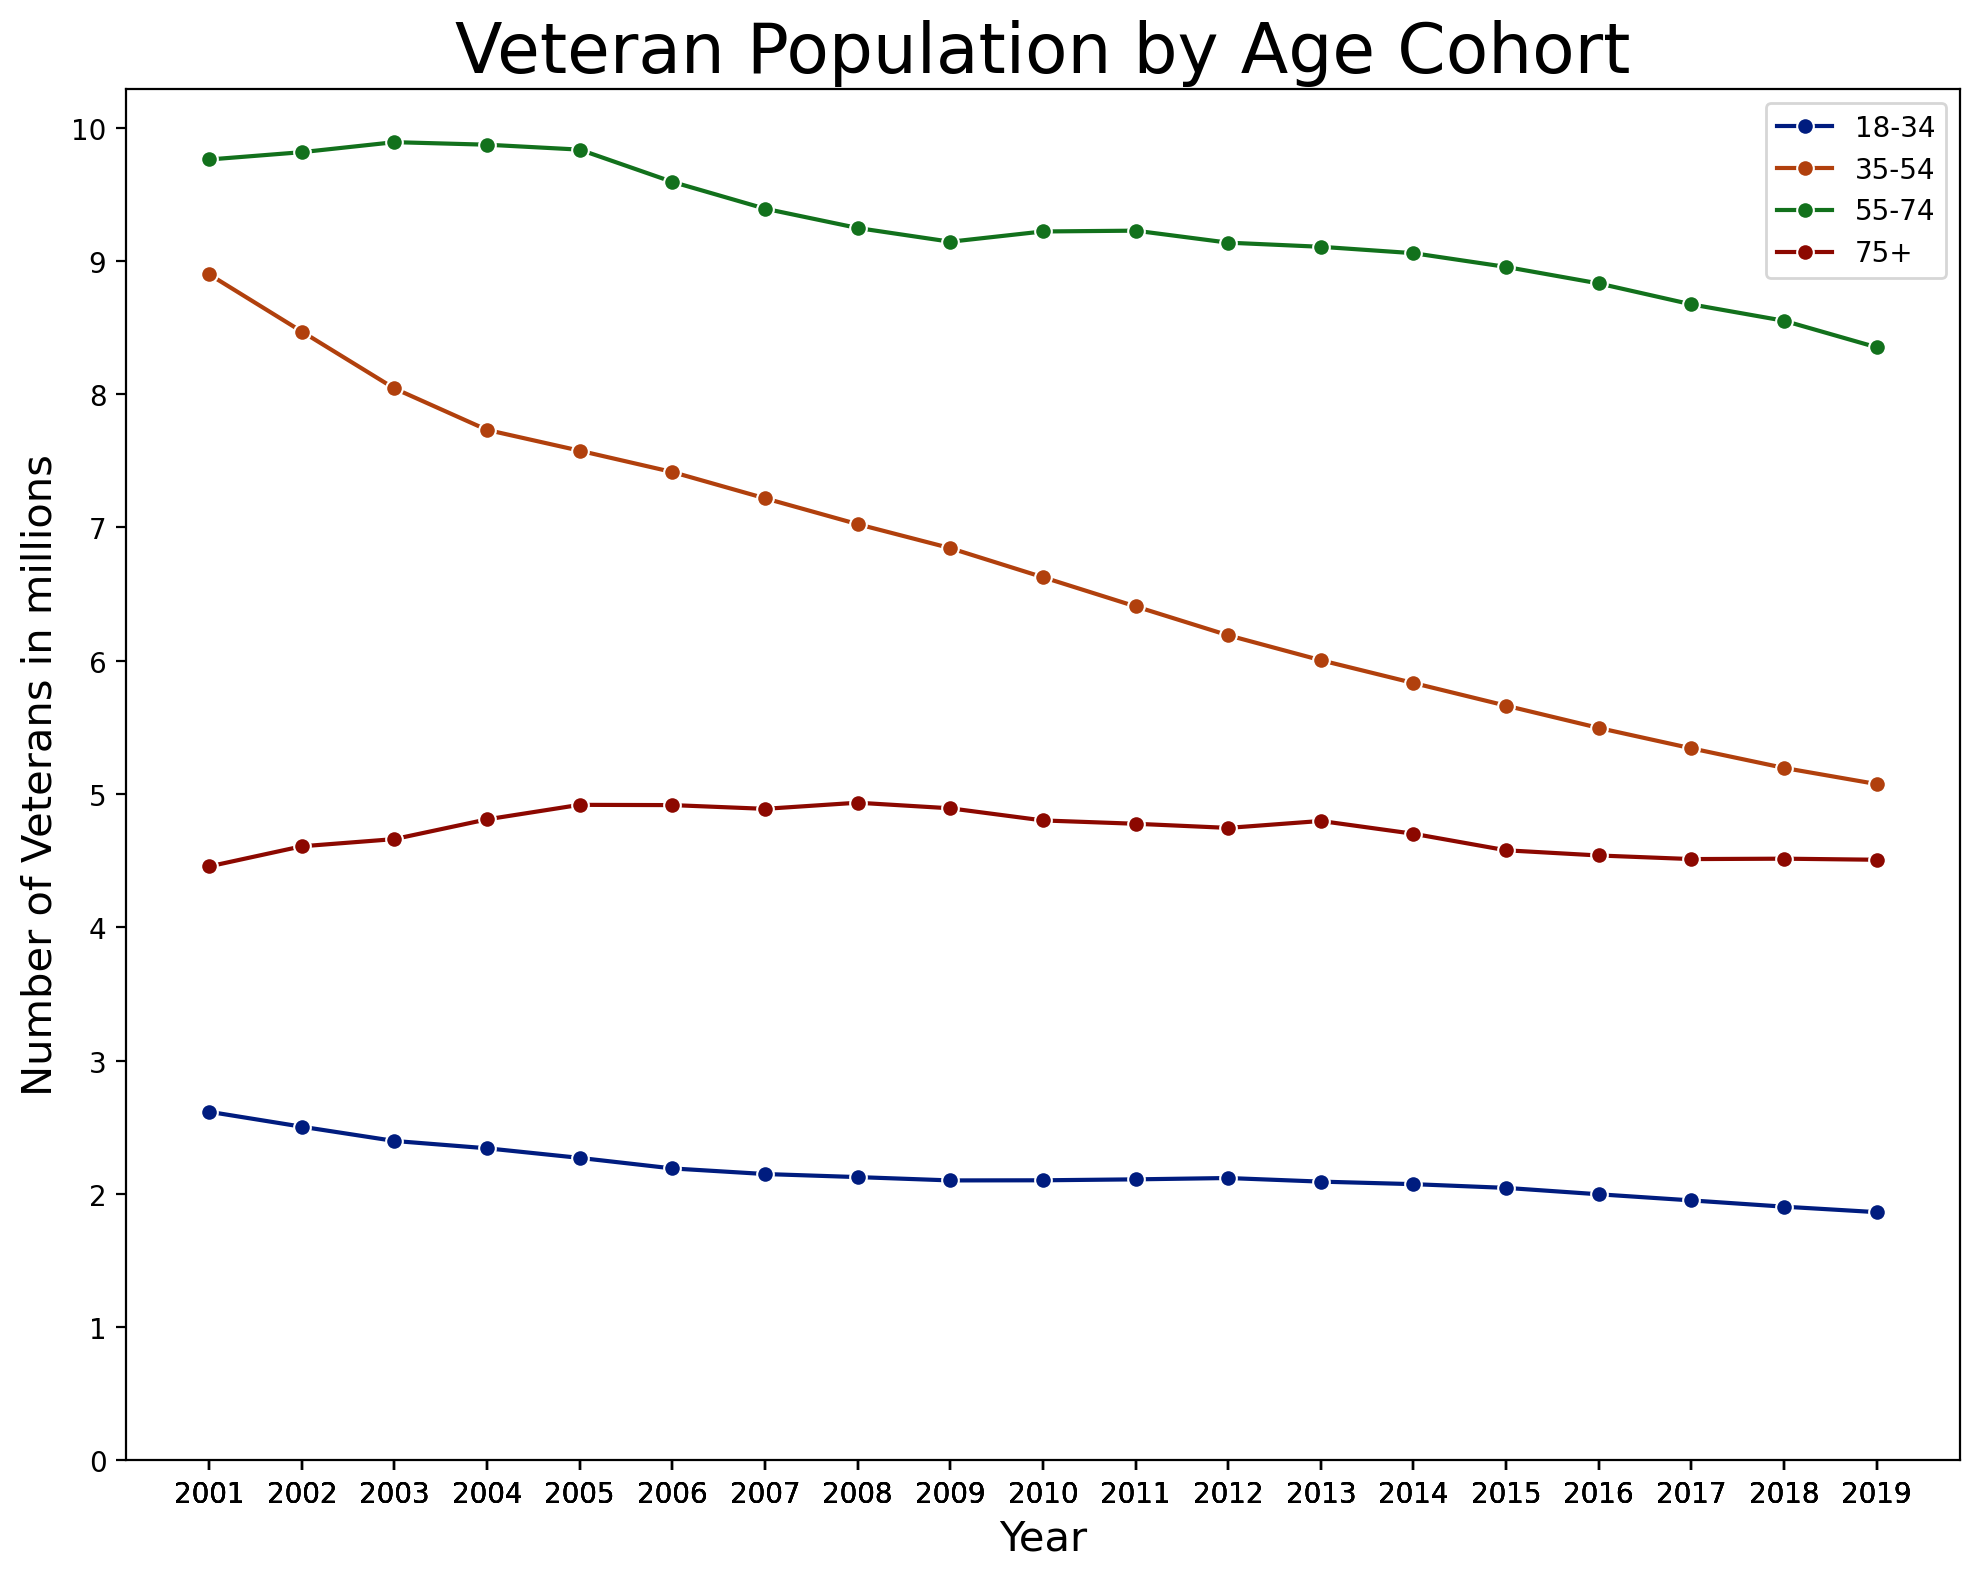

In [23]:
fig, ax = plt.subplots(figsize = (10,8), dpi=200)
sns.lineplot(x= df_18_34['Year'], y= df_18_34['Veteran Population Estimate in millions'], marker='o', label = '18-34')
sns.lineplot(x= df_35_54['Year'], y= df_35_54['Veteran Population Estimate in millions'], marker='o', label = '35-54')
sns.lineplot(x= df_55_74['Year'], y= df_55_74['Veteran Population Estimate in millions'], marker='o', label = '55-74')
sns.lineplot(x= df_75['Year'], y= df_75['Veteran Population Estimate in millions'], marker='o', label = '75+')
ax.set_title('Veteran Population by Age Cohort',  fontsize = 25)
ax.set_xticks(df['Year'])
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Number of Veterans in millions', fontsize = 15)
ax.set_yticks(np.arange(0, 11, 1))
plt.yticks(fontsize = 10)
plt.legend()
fig.tight_layout()
#plt.savefig('1.jpg', bbox_inches="tight")

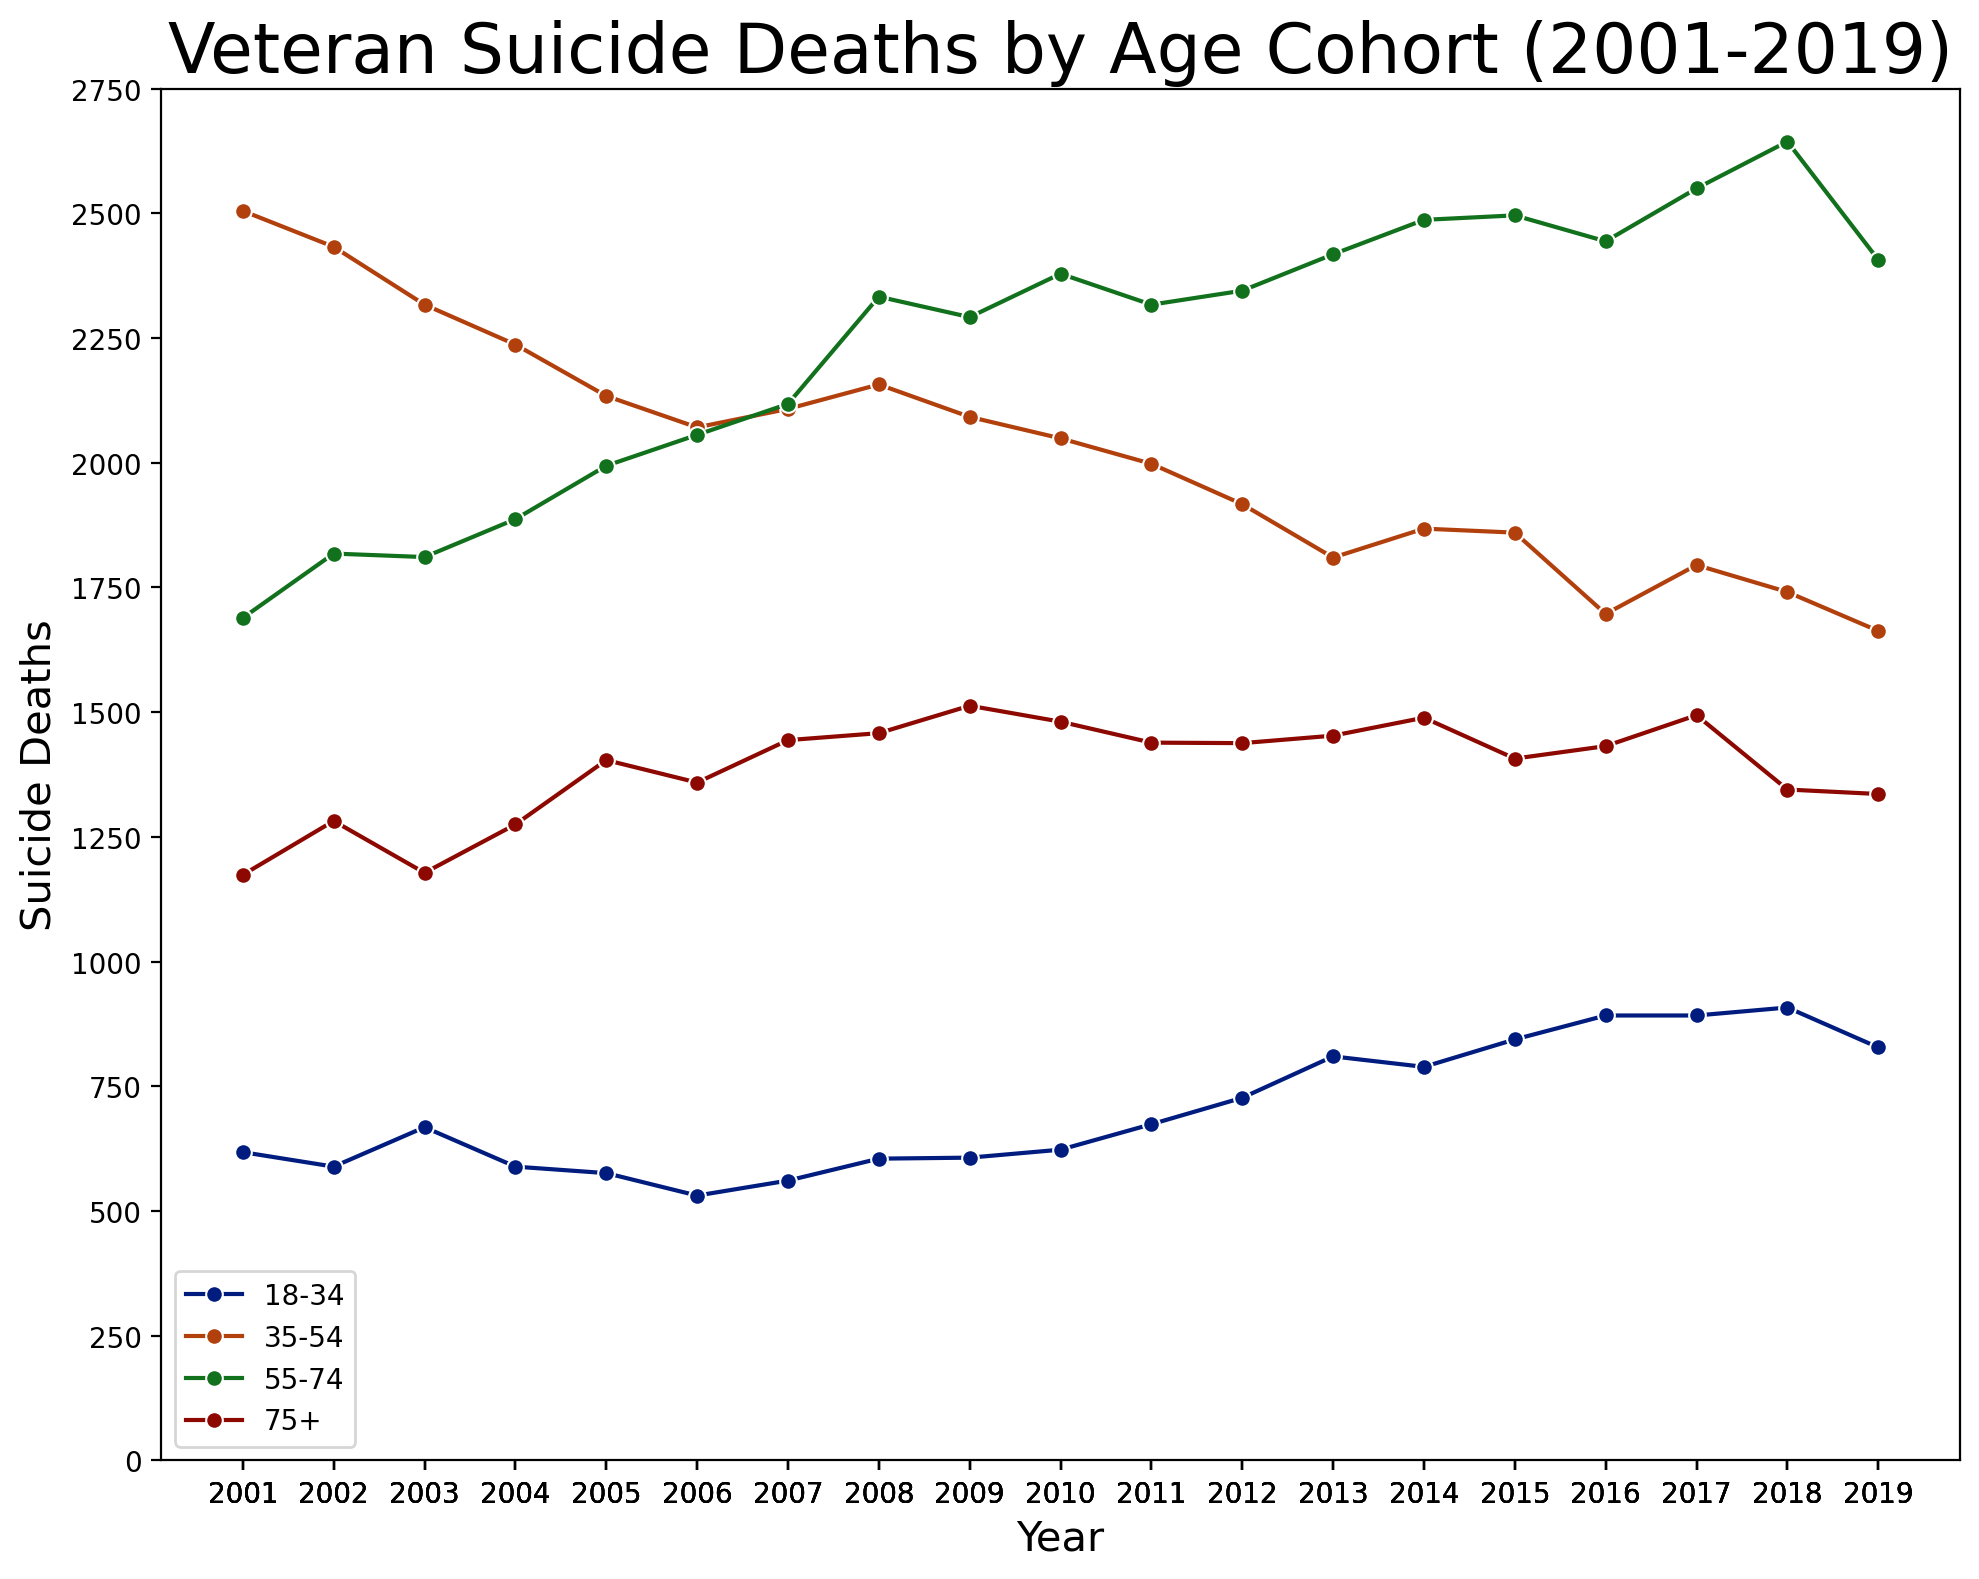

In [24]:
fig, ax = plt.subplots(figsize = (10,8), dpi=200)
sns.lineplot(x= df_18_34['Year'], y= df_18_34['Veteran Suicide Deaths'], marker='o', label = '18-34')
sns.lineplot(x= df_35_54['Year'], y= df_35_54['Veteran Suicide Deaths'], marker='o', label = '35-54')
sns.lineplot(x= df_55_74['Year'], y= df_55_74['Veteran Suicide Deaths'], marker='o', label = '55-74')
sns.lineplot(x= df_75['Year'], y= df_75['Veteran Suicide Deaths'], marker='o', label = '75+')
ax.set_title('Veteran Suicide Deaths by Age Cohort (2001-2019)', fontsize = 25)
ax.set_xticks(df['Year'])
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Suicide Deaths', fontsize = 15)
ax.set_yticks(np.arange(0, 3000, 250))
plt.yticks(fontsize = 10)
plt.legend()
fig.tight_layout()
#plt.savefig('1.jpg', bbox_inches="tight")

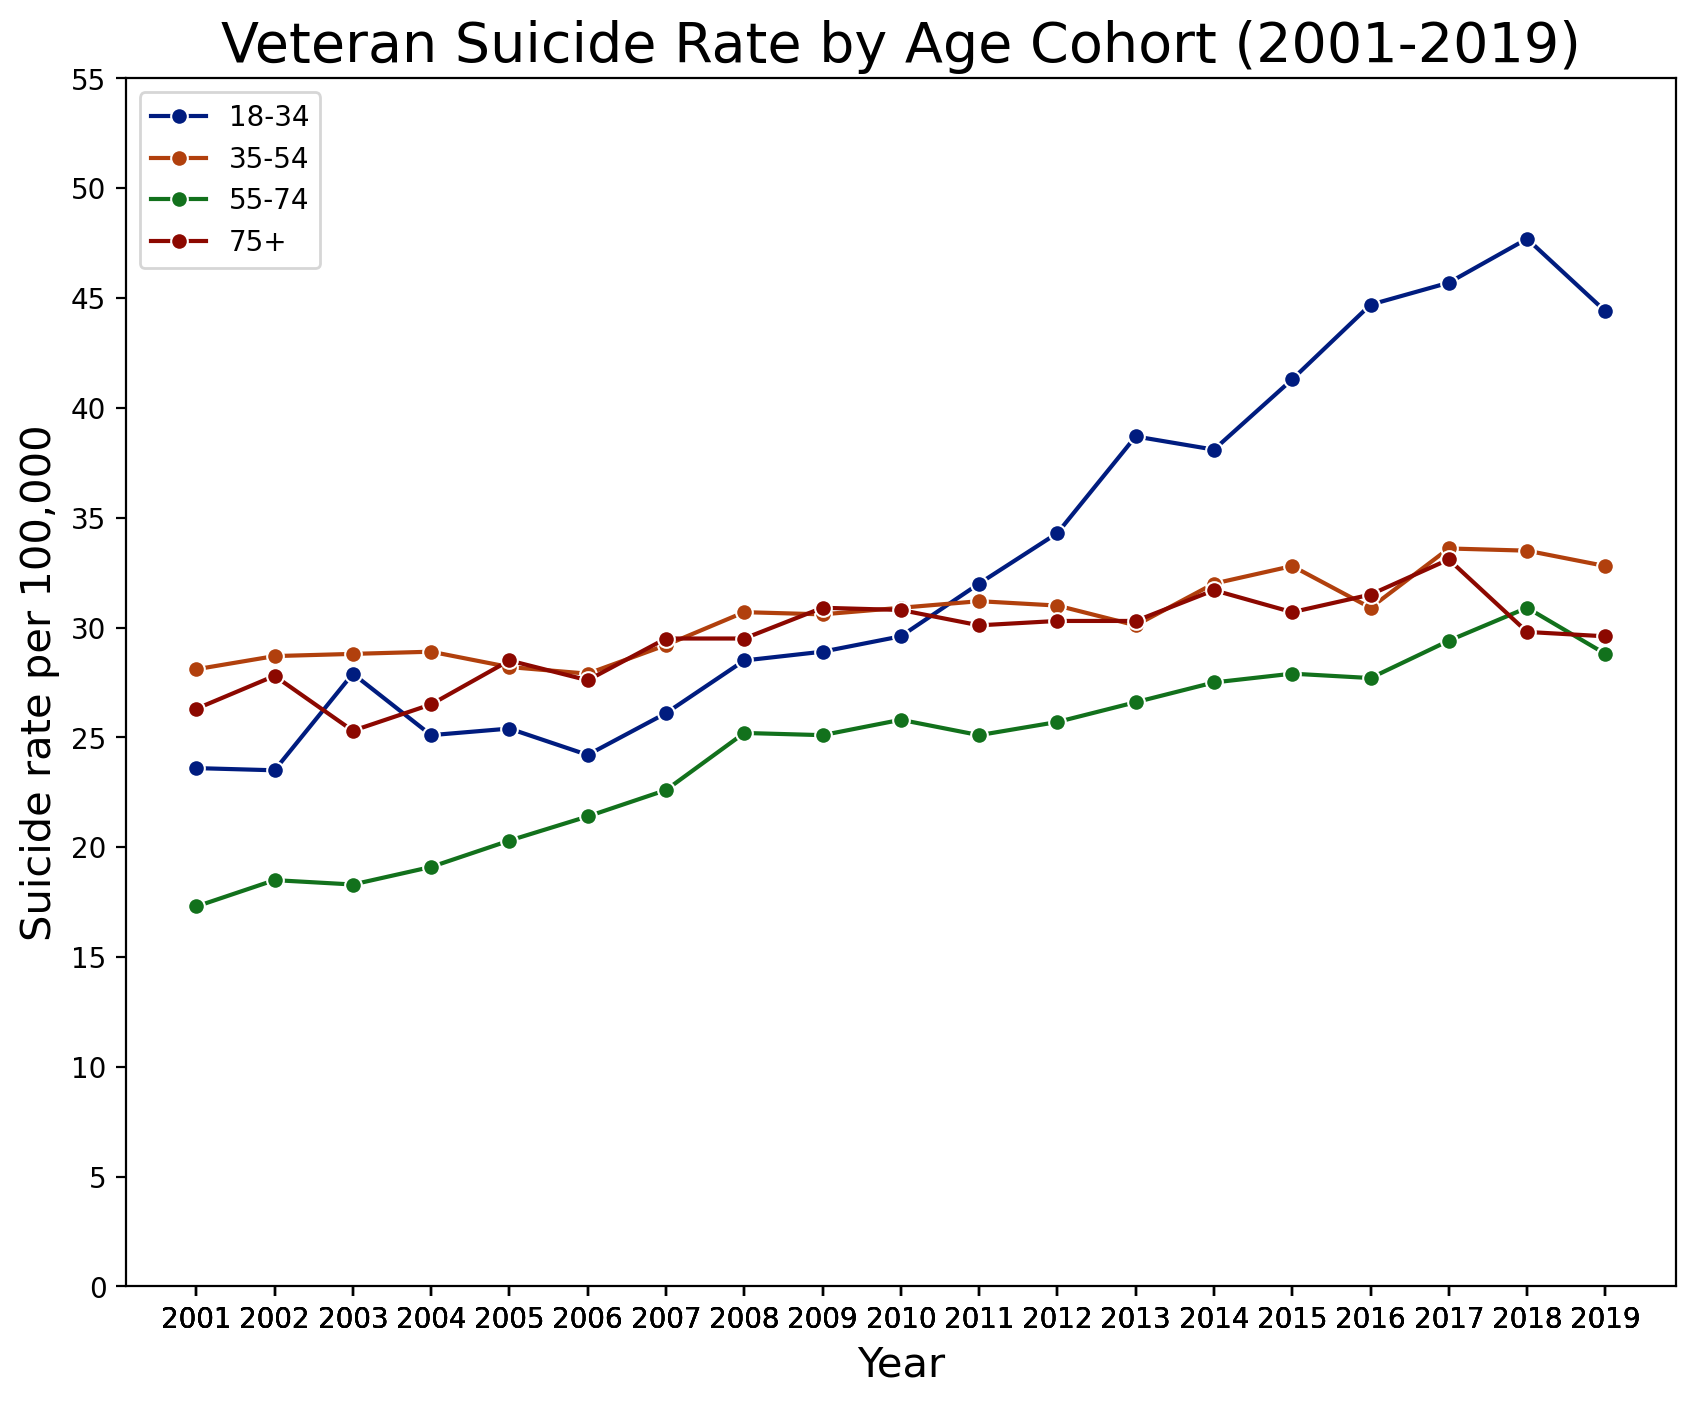

In [25]:
fig, ax = plt.subplots(figsize = (10,8), dpi=200)
sns.lineplot(x= df_18_34['Year'], y= df_18_34['Veteran Crude Rate per 100,000'], marker='o', label = '18-34')
sns.lineplot(x= df_35_54['Year'], y= df_35_54['Veteran Crude Rate per 100,000'], marker='o', label = '35-54')
sns.lineplot(x= df_55_74['Year'], y= df_55_74['Veteran Crude Rate per 100,000'], marker='o', label = '55-74')
sns.lineplot(x= df_75['Year'], y= df_75['Veteran Crude Rate per 100,000'], marker='o', label = '75+')
plt.title('Veteran Suicide Rate by Age Cohort (2001-2019)', fontsize = 20)
plt.xticks(df['Year'])
ax.set_yticks(np.arange(0, 60, 5))
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Suicide rate per 100,000', fontsize = 15)
plt.legend(loc='upper left')

#plt.savefig('1.jpg', bbox_inches="tight")
plt.show()

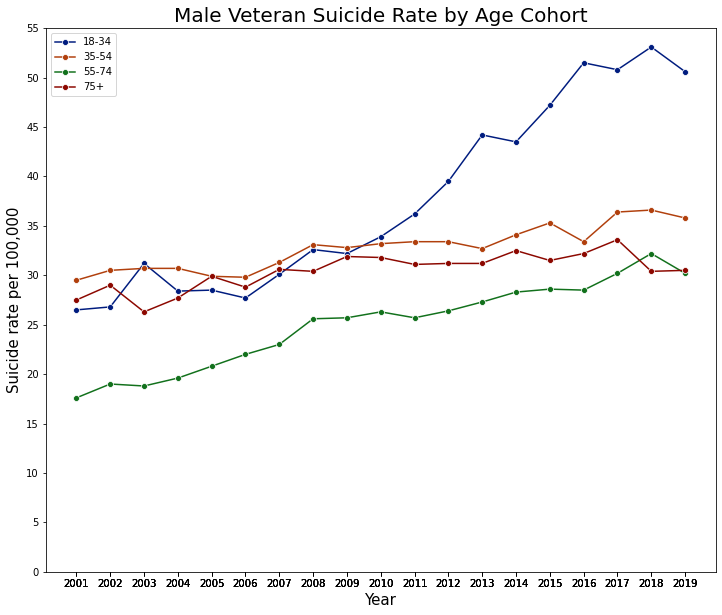

In [26]:
fig, ax = plt.subplots(figsize = (12,10))
sns.lineplot(x= df_18_34['Year'], y= df_18_34['Male Veteran Crude Rate per 100,000'], marker='o', label = '18-34')
sns.lineplot(x= df_35_54['Year'], y= df_35_54['Male Veteran Crude Rate per 100,000'], marker='o', label = '35-54')
sns.lineplot(x= df_55_74['Year'], y= df_55_74['Male Veteran Crude Rate per 100,000'], marker='o', label = '55-74')
sns.lineplot(x= df_75['Year'], y= df_75['Male Veteran Crude Rate per 100,000'], marker='o', label = '75+')
plt.title('Male Veteran Suicide Rate by Age Cohort', fontsize = 20)
plt.xticks(df['Year'])
ax.set_yticks(np.arange(0, 60, 5))
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Suicide rate per 100,000', fontsize = 15)
plt.legend()
#plt.savefig('1.jpg', bbox_inches="tight")
plt.show()

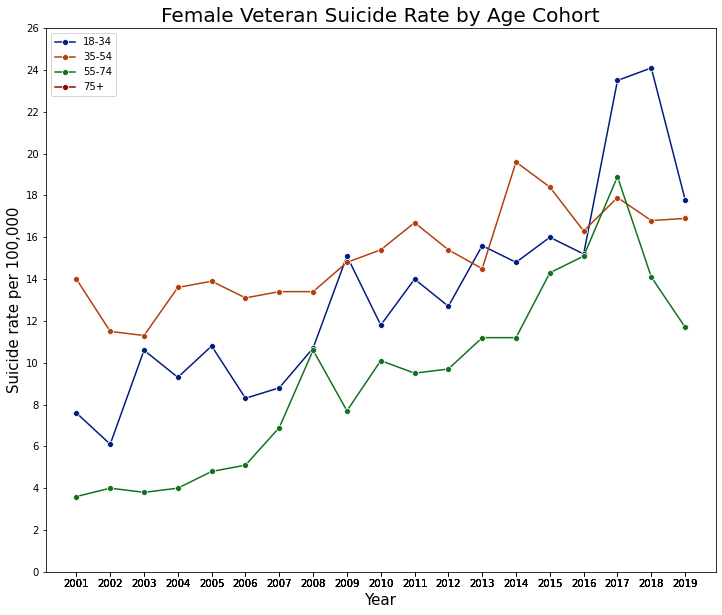

In [27]:
fig, ax = plt.subplots(figsize = (12,10))
sns.lineplot(x= df_18_34['Year'], y= df_18_34['Female Veteran Crude Rate per 100,000'], marker='o', label = '18-34')
sns.lineplot(x= df_35_54['Year'], y= df_35_54['Female Veteran Crude Rate per 100,000'], marker='o', label = '35-54')
sns.lineplot(x= df_55_74['Year'], y= df_55_74['Female Veteran Crude Rate per 100,000'], marker='o', label = '55-74')
sns.lineplot(x= df_75['Year'], y= df_75['Female Veteran Crude Rate per 100,000'], marker='o', label = '75+')
plt.title('Female Veteran Suicide Rate by Age Cohort', fontsize = 20)
plt.xticks(df['Year'])
ax.set_yticks(np.arange(0, 27, 2))
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Suicide rate per 100,000', fontsize = 15)
plt.legend()
#plt.savefig('1.jpg', bbox_inches="tight")
plt.show()

In [28]:
#df.groupby(['Age Group', 'Year']).sum()

In [29]:
df_2019 = df[df['Year'] == 2019]

In [30]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 90 to 93
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     4 non-null      int64  
 1   Age Group                                4 non-null      object 
 2   Veteran Suicide Deaths                   4 non-null      int64  
 3   Veteran Population Estimate              4 non-null      int64  
 4   Veteran Crude Rate per 100,000           4 non-null      float64
 5   Male Veteran Suicide Deaths              4 non-null      int64  
 6   Male Veteran Population Estimate         4 non-null      int64  
 7   Male Veteran Crude Rate per 100,000      4 non-null      float64
 8   Age Group 2                              3 non-null      object 
 9   Female Veteran Suicide Deaths            3 non-null      float64
 10  Female Veteran Population Estimate       3 non-null 

## Test 3
### Null Hypothesis: No significant difference in suicide proportions in 18-34 age cohort and 35-54 age cohort
### Alternate Hypothesis: Significant difference in suicide proportions in 18-34 age cohort and 35-54 age cohort
#### Threshold with (Bonferroni correction): 0.017

##### Testing with 2019 data

In [31]:
df_2019.head()

,Year,Age Group,Veteran Suicide Deaths,Veteran Population Estimate,"Veteran Crude Rate per 100,000",Male Veteran Suicide Deaths,Male Veteran Population Estimate,"Male Veteran Crude Rate per 100,000",Age Group 2,Female Veteran Suicide Deaths,Female Veteran Population Estimate,"Female Veteran Crude Rate per 100,000",Veteran Population Estimate in millions
90,2019,18-34,828,1863000,44.4,766,1514000,50.6,18-34,62.0,349000.0,17.8,1.863
91,2019,35-54,1663,5075000,32.8,1525,4258000,35.8,35-54,138.0,817000.0,16.9,5.075
92,2019,55-74,2407,8352000,28.8,2317,7669000,30.2,55+,97.0,826000.0,11.7,8.352
93,2019,75+,1336,4507000,29.6,1329,4364000,30.5,NaN,NaN,NaN,NaN,4.507


In [32]:
shared_sample_freq = (828 + 1663) / 6938000
shared_sample_variance = 6938000 * (shared_sample_freq * (1 - shared_sample_freq)) / (1863000 * 5075000)

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

Text(0.5, 1.0, 'Distribution of Difference in Sample Frequencies Assuming $H_0$')

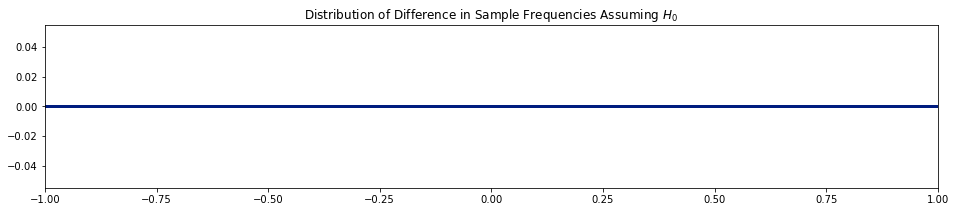

In [33]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=1000)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.set_xlim(-1, 1)
ax.set_title("Distribution of Difference in Sample Frequencies Assuming $H_0$")

In [34]:
sample_18_34_freq = 828/1863000
sample_35_54_freq = 1663/5075000
difference_in_sample_proportions = sample_18_34_freq - sample_35_54_freq
print(difference_in_sample_proportions)

0.00011675971538040506


In [35]:
p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print(p_value)

3.1319391524675666e-13


Text(0.5, 1.0, 'p-value Reigon')

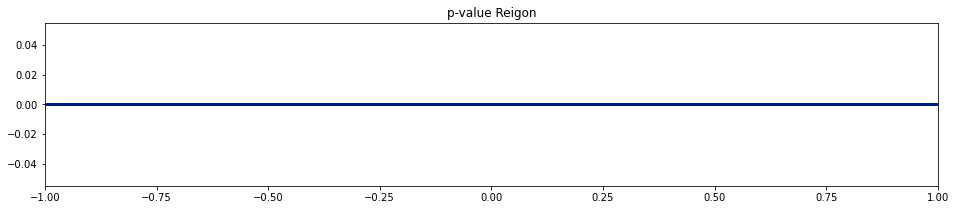

In [36]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=250)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.fill_between(x, difference_in_proportions.pdf(x), where=(x >= difference_in_sample_proportions),
                color="red", alpha=0.5)
ax.set_xlim(-1, 1)
ax.set_title("p-value Reigon")

### Test 4.2
#### H0: VA age 18-34 <= 55-74
#### Ha: VA age 18-34 > 55-74

In [ ]:
df_2019.head()

In [ ]:
shared_sample_freq = (828 + 2407) / (1863000+8352000)
shared_sample_variance = (1863000+8352000) * (shared_sample_freq * (1 - shared_sample_freq)) / (1863000*8352000)

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

In [ ]:
sample_18_34_freq = 828/1863000
sample_55_74_freq = 2407/8352000
difference_in_sample_proportions = sample_18_34_freq - sample_55_74_freq
print(difference_in_sample_proportions)

In [ ]:
p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print(p_value)

Testing with median year

In [ ]:
df_2010 = df[df['Year'] == 2010]

In [ ]:
df_2010.head()

In [ ]:
shared_sample_freq = (623 + 2049) / (2102000+6627000)
shared_sample_variance = (2102000+6627000) * (shared_sample_freq * (1 - shared_sample_freq)) / (2102000*6627000)

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

In [ ]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=1000)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.set_xlim(-1, 1)
ax.set_title("Distribution of Difference in Sample Frequencies Assuming $H_0$")

In [ ]:
sample_18_34_freq = 623/2102000
sample_35_54_freq = 2049/6627000
difference_in_sample_proportions = sample_18_34_freq - sample_35_54_freq
print(difference_in_sample_proportions)

In [ ]:
p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print(p_value)

In [ ]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=250)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.fill_between(x, difference_in_proportions.pdf(x), where=(x >= difference_in_sample_proportions),
                color="red", alpha=0.5)
ax.set_xlim(-1, 1)
ax.set_title("p-value Reigon")